In [117]:
import matplotlib.pyplot as plt
import numpy as np

In [118]:

def generate_poisson(average, size):
    poisson_values = np.random.poisson(average, size)
    sorted_values = np.sort(poisson_values)
    return sorted_values




In [119]:
def NSi(k, n):
    # Ensure k and n are numpy arrays for element-wise operations
    k = np.array(k)
    n = np.array(n)
    # Calculate the NSi values for each pair of k and n
    results = k * np.exp(-k / n)

    return results

def NCi(k, n):
     # Ensure k and n are numpy arrays for element-wise operations
    k = np.array(k)
    n = np.array(n)
    results = n - k*np.exp(-k/n) - n*np.exp(-k/n)
    return results

def k_array(k0, N, i):
    k = np.array(np.zeros(i))
    k[0] = k0
    for j in range(0, i-1):
        k[j+1] = k[j]*(1-np.exp(-k[j]/N))
    return k


def successP(i_max, M, NSi):
     return NSi[0:i_max].sum() / M

def meanAccDelay(i_max, NSi):
    n =  NSi[0:i_max]
    indices = np.arange(1, len(n) + 1)
    nMultiplied = n * indices

    return nMultiplied.sum() / n.sum()

def collisionP(NCi, i_max, N):
    return(NCi[0:i_max].sum() / (N*i_max))
    


    
        


### RAO Equation

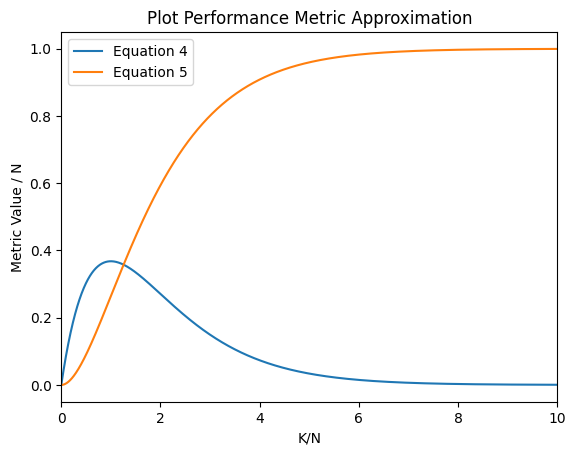

In [120]:


plt.title('Plot Performance metric approximation')

for N in [3]:
    i = N * 1000  # Number of points
    k0 = N * 10  # Maximum value for K
    K = np.linspace(0, k0, i)  # Generate K values

    NSi1 = NSi(K, N)  # Compute NSi values
    NCi1 = NCi(K, N)  # Compute NCi values

    # Normalize K, NSi1, and NCi1 by N for plotting
    normalized_K = K / N
    normalized_NSi1 = NSi1 / N
    normalized_NCi1 = NCi1 / N

    # Plotting
    plt.title('Plot Performance Metric Approximation')
    plt.plot(normalized_K, normalized_NSi1, label='Equation 4')
    plt.plot(normalized_K, normalized_NCi1, label='Equation 5')
    plt.xlim(0, 10)  # Set x-axis limits
    plt.xlabel('K/N')  # x-axis label
    plt.ylabel('Metric Value / N')  # y-axis label
    plt.legend()  # Show legend
    plt.show()  # Display plot





In [121]:
 
### Plot the success probability
i_max = 200
k0 = 100
input_list = list(range(1,45))
success_probability_list = np.zeros(len(input_list))
mean_access_delay_list = np.zeros(len(input_list))
collision_probability_list = np.zeros(len(input_list))

for i in input_list:
        K = k_array(i_max, i, i_max)
        n_success = NSi(K, i)
        n_collide = NCi(K, i)
        success_probability_i= successP(i_max, k0, n_success)
        success_probability_list[i-1] = success_probability_i
        mean_access_delay_i = meanAccDelay(i_max, n_success)
        mean_access_delay_list[i-1] = mean_access_delay_i
        collision_probability_i = collisionP(n_collide, i_max, i)
        collision_probability_list[i-1] = collision_probability_i
        
    
    

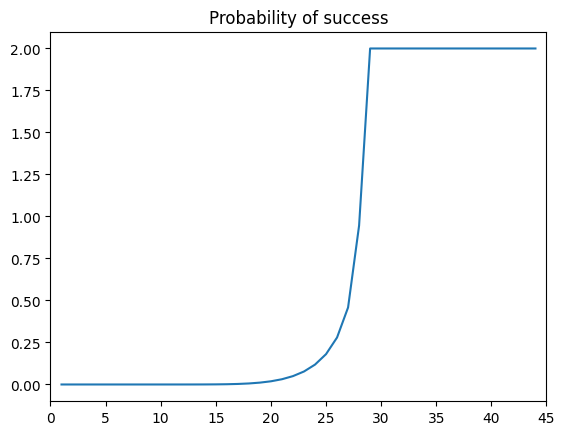

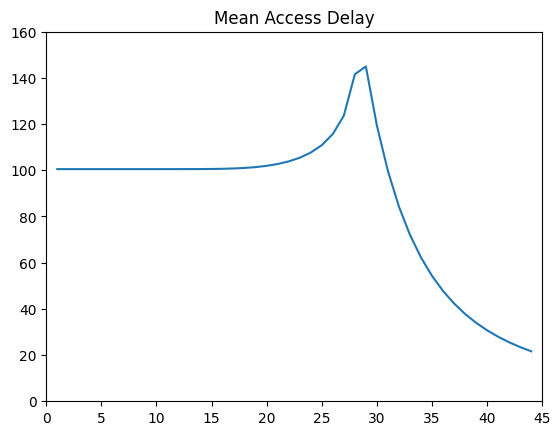

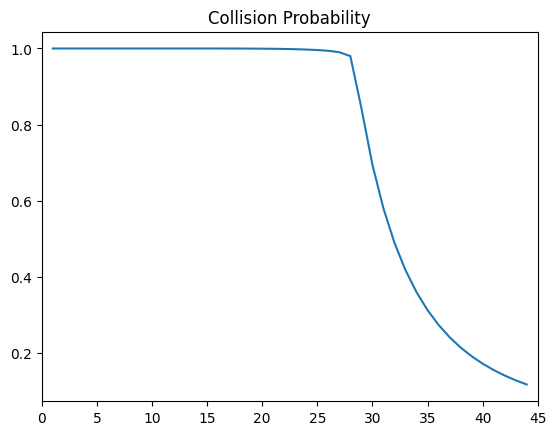

In [122]:
plt.title('Probability of success')
plt.xlim(0,45)
plt.plot(input_list, success_probability_list, label='Equation 6')
plt.show()

plt.title('Mean Access Delay')
plt.xlim(0,45)
plt.ylim(0,160)
plt.plot(input_list, mean_access_delay_list, label='Equation 6')
plt.show()

plt.title('Collision Probability')
plt.xlim(0,45)
plt.plot(input_list, collision_probability_list, label='Equation 6')
plt.show()




